In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import os
os.chdir("..")
os.chdir("Preprocessing")
from preprocessing import *
import selfies as sf

#Ensemble learning and random forest

df = preprocessing("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\kcat_transferase.csv")

In [4]:
df.head()

,EC_number,Species,Compound,Compound_name,Amino_encoding,Kcat,unit
0,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDFLEKYYKFGSRHSAESQILKHLLKNLF...,0.0410,s^(-1)
1,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,1.0200,s^(-1)
2,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,0.0830,s^(-1)
3,2.1.1.10,Brassica oleracea,C(CS)C(C(=O)O)N,L-Homocysteine,MGLEKKSALLEDLIEKCGGCAVVDGGFATQLEIHGAAINDPLWSAV...,0.0375,s^(-1)
4,2.1.1.10,Escherichia coli,C(CS)C(C(=O)O)N,L-Homocysteine,MSQNNPLRALLDKQDILLLDGAMATELEARGCNLADSLWSAKVLVE...,0.3800,s^(-1)


In [6]:
from transformers import BertTokenizer, BertModel
import pandas as pd

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert_bfd', do_lower_case=False )
model = BertModel.from_pretrained("Rostlab/prot_bert_bfd")

embedding_list = []

def get_protbert_embedding(sequence):
    # Tokenize the sequence
    inputs = tokenizer(sequence, return_tensors="pt", padding=True, truncation=True)
    
    # Forward pass
    outputs = model(**inputs)
    
    # Get embeddings
    embeddings = outputs.last_hidden_state
    
    # Optional: Convert PyTorch tensor to NumPy array
    embeddings = embeddings.detach().numpy()
    
    embedding_list.append(embeddings)

# Assuming df['sequence_column'] contains your amino acid sequences
df['Amino_encoding'].apply(get_protbert_embedding)

# Create a new DataFrame with only embeddings
embeddings_df = pd.DataFrame({'embeddings': embedding_list})

embeddings_df.to_pickle('embeddings.pkl')


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [7]:
# concatenate the two features

unpickled_df = pd.read_pickle('embeddings.pkl')

In [16]:
unpickled_df.head()

,embeddings
0,"[[[0.030547485, 0.024375742, 0.13630427, 0.032..."
1,"[[[0.030547485, 0.024375742, 0.13630427, 0.032..."
2,"[[[0.030547485, 0.024375742, 0.13630427, 0.032..."
3,"[[[0.030547485, 0.024375742, 0.13630427, 0.032..."
4,"[[[0.030547485, 0.024375742, 0.13630427, 0.032..."


In [17]:
# Extract the embeddings from the DataFrame into a list
embedding_list = unpickled_df['embeddings'].tolist()

# Convert this list into a numpy array
embedding_array = np.array(embedding_list)

# Reshape this array into 2D; -1 infers the size for that dimension
reshaped_embeddings = embedding_array.reshape(len(embedding_list), -1)

# Create a DataFrame from the 2D array
flattened_df = pd.DataFrame(reshaped_embeddings)


In [26]:
flattened_df.to_csv('ProTbert_embed.csv', index=False)

In [28]:
ProTbert = pd.read_csv("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\ProTbert_embed.csv")

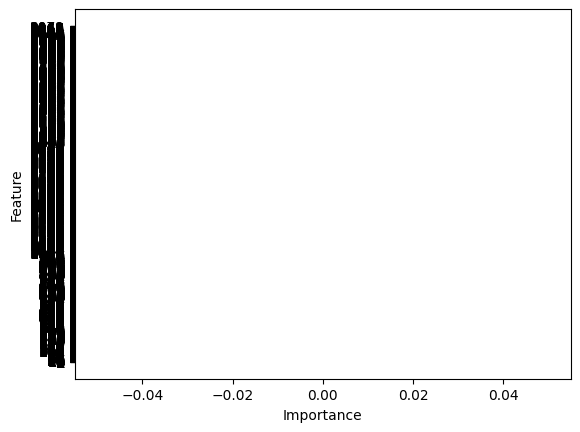

In [29]:
# Split data
import matplotlib.pyplot as plt


X = ProTbert
y = np.log10(df["Kcat"])

feature_names = X.columns.tolist()


# Train a random forest regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [30]:
print(importances)

[0. 0. 0. ... 0. 0. 0.]
